Enter the file path to save the model: train_classifier1_model


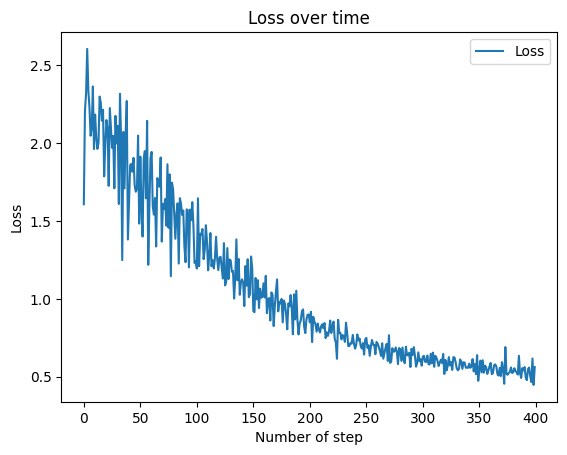

In [4]:
# Imports
%matplotlib inline


import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from LogisticsRegression import LogisticsRegression


# Loading the dataset
iris = load_iris()


# Loading the dataset into input features and output labels
X, y = iris.data[:, 2:], iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size=0.9)


# Standardize the input dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize the model
classifier = LogisticsRegression()

# Train the model
# Returns the loss history
loss_history = classifier.fit(X_train_scaled, y_train)


# Predict using the model
# Returns the prediction
classifier.predict(X_test_scaled)

# Loss Score of a model
# Returns the cost of a model
classifier.score(X_test_scaled, y_test)


# Saving the model
file_path = input('Enter the file path to save the model: ')
model = {
    'parameters': np.concatenate([classifier.bias.reshape(-1, 3), classifier.weights]),
    'X_test': X_test_scaled,
    'y_test': y_test
}

with open(file_path, 'wb') as file:
    pickle.dump(model, file)
    
# Plotting the loss history
plt.plot(loss_history, label = 'Loss')
plt.title('Loss over time')
plt.ylabel('Loss')
plt.xlabel('Number of step')

plt.legend()
plt.show()

In [5]:
from mlxtend.plotting import plot_decision_regions

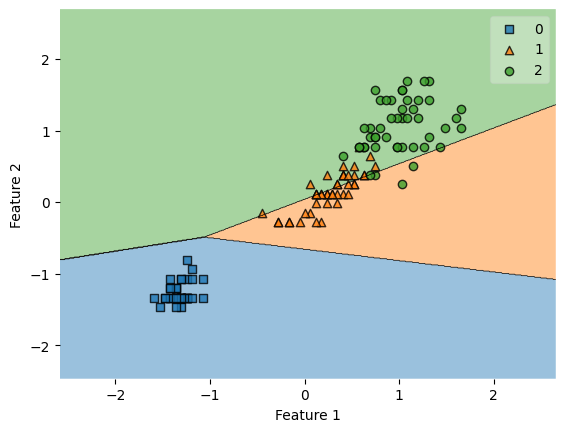

In [6]:
plot_decision_regions(X_train_scaled, y_train, clf=classifier)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()